In [1]:
# https://www.yutaka-note.com/entry/matplotlib_inline
%matplotlib inline

In [2]:
import collections
import csv
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pycircos
from collections import Counter
from IPython.display import display
Garc    = pycircos.Garc
Gcircle = pycircos.Gcircle

direction = 'down'

### Display chromosome

- Chromosomes that do not plot the extracted genes are not displayed in the Circos plot.

In [3]:
combined_df_score = pd.read_csv(f"../data/circos_hr_DOWN_2311/combined_position_down.tsv", sep='\t')
combined_df_score.sort_values(by=['Chromosome/scaffold name', 'Gene start (bp)'], inplace=True)

# Create list of unique chromosome/scaffold name
unique_chromosomes = combined_df_score['Chromosome/scaffold name'].unique()

display(combined_df_score)

Gene stable ID Chromosome/scaffold name  HN-score(HN5) organism  \
18   ENSG00000204479                      H_1            -14    human   
184  ENSG00000215695                      H_1            -26    human   
111  ENSG00000179023                      H_1            -18    human   
8    ENSG00000175087                      H_1            -14    human   
44   ENSG00000176092                      H_1            -15    human   
..               ...                      ...            ...      ...   
414     Os09g0519100                      R_9            -53     rice   
265     Os09g0547000                      R_9            -42     rice   
541     Os09g0551600                      R_9           -102     rice   
226     Os09g0554200                      R_9            -40     rice   
218     Os09g0567500                      R_9            -40     rice   

     Gene start (bp)  Gene end (bp)  
18        13389632.0     13392629.0  
184       15659713.0     15662033.0  
111       18480930.0     18485974.0  
8         26111165.0     26125555.0  
44        26321698.0     26360080.0  
..               ...            ...  
414       20268863.0     20269717.0  
265       21604588.0     21605172.0  
541       21856873.0     21858935.0  
226       21956407.0     21957337.0  
218       22660725.0     22665351.0  

[588 rows x 6 columns]

In [4]:
#organism = "human"
df = pd.read_csv("../data/chromosome/chromosome_human.tsv", sep='\t')
df_subset = df[['chr', 'start', 'end']].copy()
df_subset['chr'] = 'H_' + df_subset['chr'].astype(str)
df_subset['organism'] = 'human'# assign the tag
df_subset = df_subset[df_subset['chr'].isin(unique_chromosomes)]

# organism = "rice" 
df1 = pd.read_csv("../data/chromosome/chromosome_rice.tsv", sep='\t')
df1_subset = df1[['chr', 'start', 'end']].copy()
df1_subset['chr'] = 'R_' + df1_subset['chr'].astype(str)    
df1_subset['organism'] = 'rice'# assign the tag
df1_subset = df1_subset[df1_subset['chr'].isin(unique_chromosomes)]
combined_df = pd.concat([df_subset, df1_subset])
combined_df.reset_index(drop=True, inplace=True)

display(combined_df)

chr  start        end organism
0    H_1      1  248956422    human
1    H_2      1  242193529    human
2    H_3      1  198295559    human
3    H_4      1  190214555    human
4    H_5      1  181538259    human
5    H_6      1  170805979    human
6    H_7      1  159345973    human
7    H_8      1  145138636    human
8    H_9      1  138394717    human
9   H_10      1  133797422    human
10  H_11      1  135086622    human
11  H_12      1  133275309    human
12  H_13      1  114364328    human
13  H_14      1  107043718    human
14  H_15      1  101991189    human
15  H_16      1   90338345    human
16  H_17      1   83257441    human
17  H_18      1   80373285    human
18  H_19      1   58617616    human
19  H_20      1   64444167    human
20  H_21      1   46709983    human
21  H_22      1   50818468    human
22   H_X      1  156040895    human
23   R_1      1   43270923     rice
24   R_2      1   35937250     rice
25   R_3      1   36413819     rice
26   R_4      1   35502694     rice
27   R_5      1   29958434     rice
28   R_6      1   31248787     rice
29   R_7      1   29697621     rice
30   R_8      1   28443022     rice
31   R_9      1   23012720     rice
32  R_10      1   23207287     rice
33  R_11      1   29021106     rice
34  R_12      1   27531856     rice

In [5]:
# Initialize
circle = Gcircle(figsize=(20,20))

# Set Chromosome Data
n = 935
m = 985

# Read the combined DataFrame
for index, row in combined_df.iterrows():
    name = row['chr']
    length = row['end']
    organism = row['organism']
    
    # get the chromosome number
    chrom_number_str = name.split('_')[1] # "H_1" -> "1"
    
    try:
        chrom_number = int(chrom_number_str)
        if organism == 'human':
            color = plt.cm.Blues(chrom_number / 24)  # change the color dynamically based on 22+X+Y
        else:
            color = plt.cm.Greens(chrom_number / 14)  # change the color dynamically based on 12+X+Y
    except ValueError:  # if chrom_number is not a number
        if chrom_number_str == "X":
            color = plt.cm.Blues(23 / 24)
        elif chrom_number_str == "Y":
            color = plt.cm.Blues(24 / 24)
        elif chrom_number_str == "Mt":
            color = plt.cm.Greens(13 / 14)
        elif chrom_number_str == "Pt":
            color = plt.cm.Greens(14 / 14)
        else:
            color = 'grey'
    
    arc = Garc(arc_id=name, 
               size=length, 
               interspace=0.2, 
               raxis_range=(n, m), 
               labelposition=int(30 + (m-n)/2),
               labelsize=7,
               label_visible=True,
               facecolor=color)
    circle.add_garc(arc)

<Figure size 2000x2000 with 0 Axes>

In [6]:
circle.set_garcs(0,360)

In [7]:
for arc_id in circle.garc_dict:
    circle.tickplot(arc_id, 
                    raxis_range=(985,1000), 
                    tickinterval=20000000, 
                    ticklabels=None) 

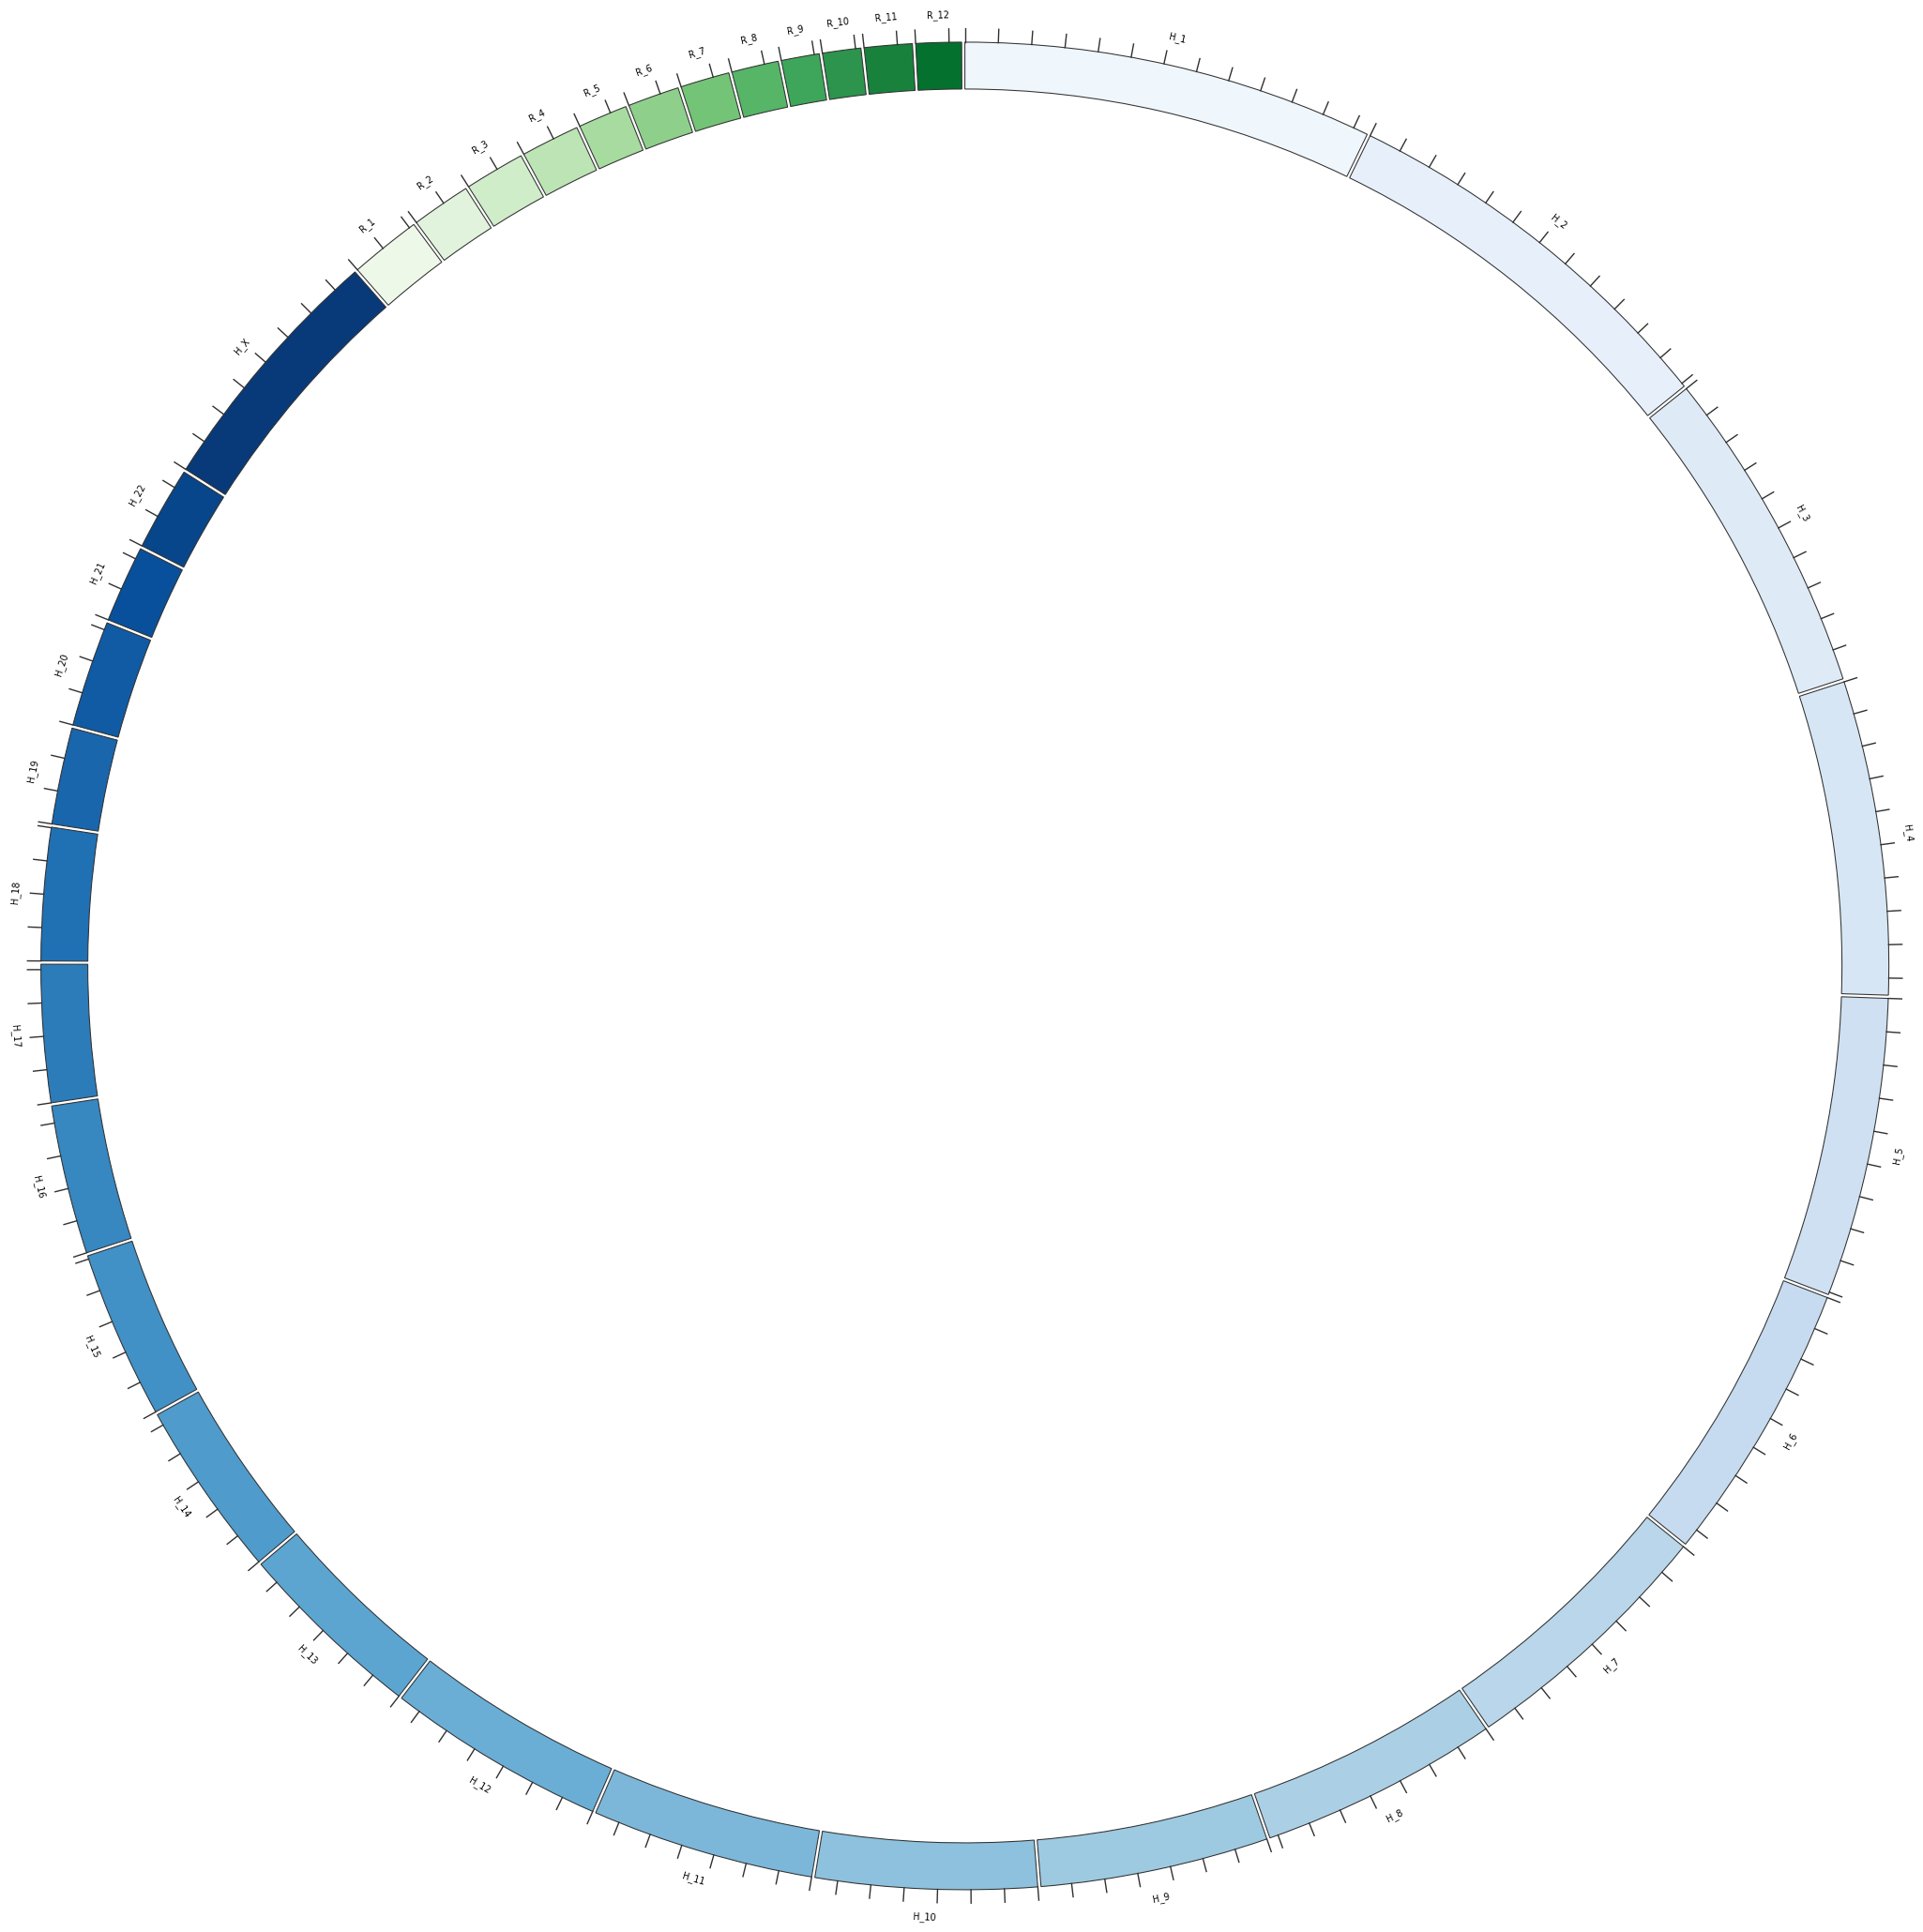

In [8]:
circle.figure

## Scatter plot of human vs rice upregulated genes

In [9]:
# Initialize
arcdata_dict = collections.defaultdict(dict)

for index, row in combined_df_score.iterrows():
    name = row['Chromosome/scaffold name']
    start = row['Gene start (bp)']
    end = row['Gene end (bp)']
    mid = (start + end) // 2
    value = row['HN-score(HN5)']

    if name not in arcdata_dict: # if the key is not in the dictionary, add it
        arcdata_dict[name]["positions"] = []
        arcdata_dict[name]["values"] = []

    arcdata_dict[name]["positions"].append(mid)
    arcdata_dict[name]["values"].append(value)


# plot
vmin, vmax = combined_df_score['HN-score(HN5)'].min(), combined_df_score['HN-score(HN5)'].max()
for key in arcdata_dict:
    circle.scatterplot(
        key,
        data=arcdata_dict[key]["values"],
        positions=arcdata_dict[key]["positions"], 
        rlim=[vmin-0.05*abs(vmin), vmax+0.05*abs(vmax)],
        raxis_range=(830, 940),
        facecolor="orangered",
        edgecolor="black",
        spine=True
    )

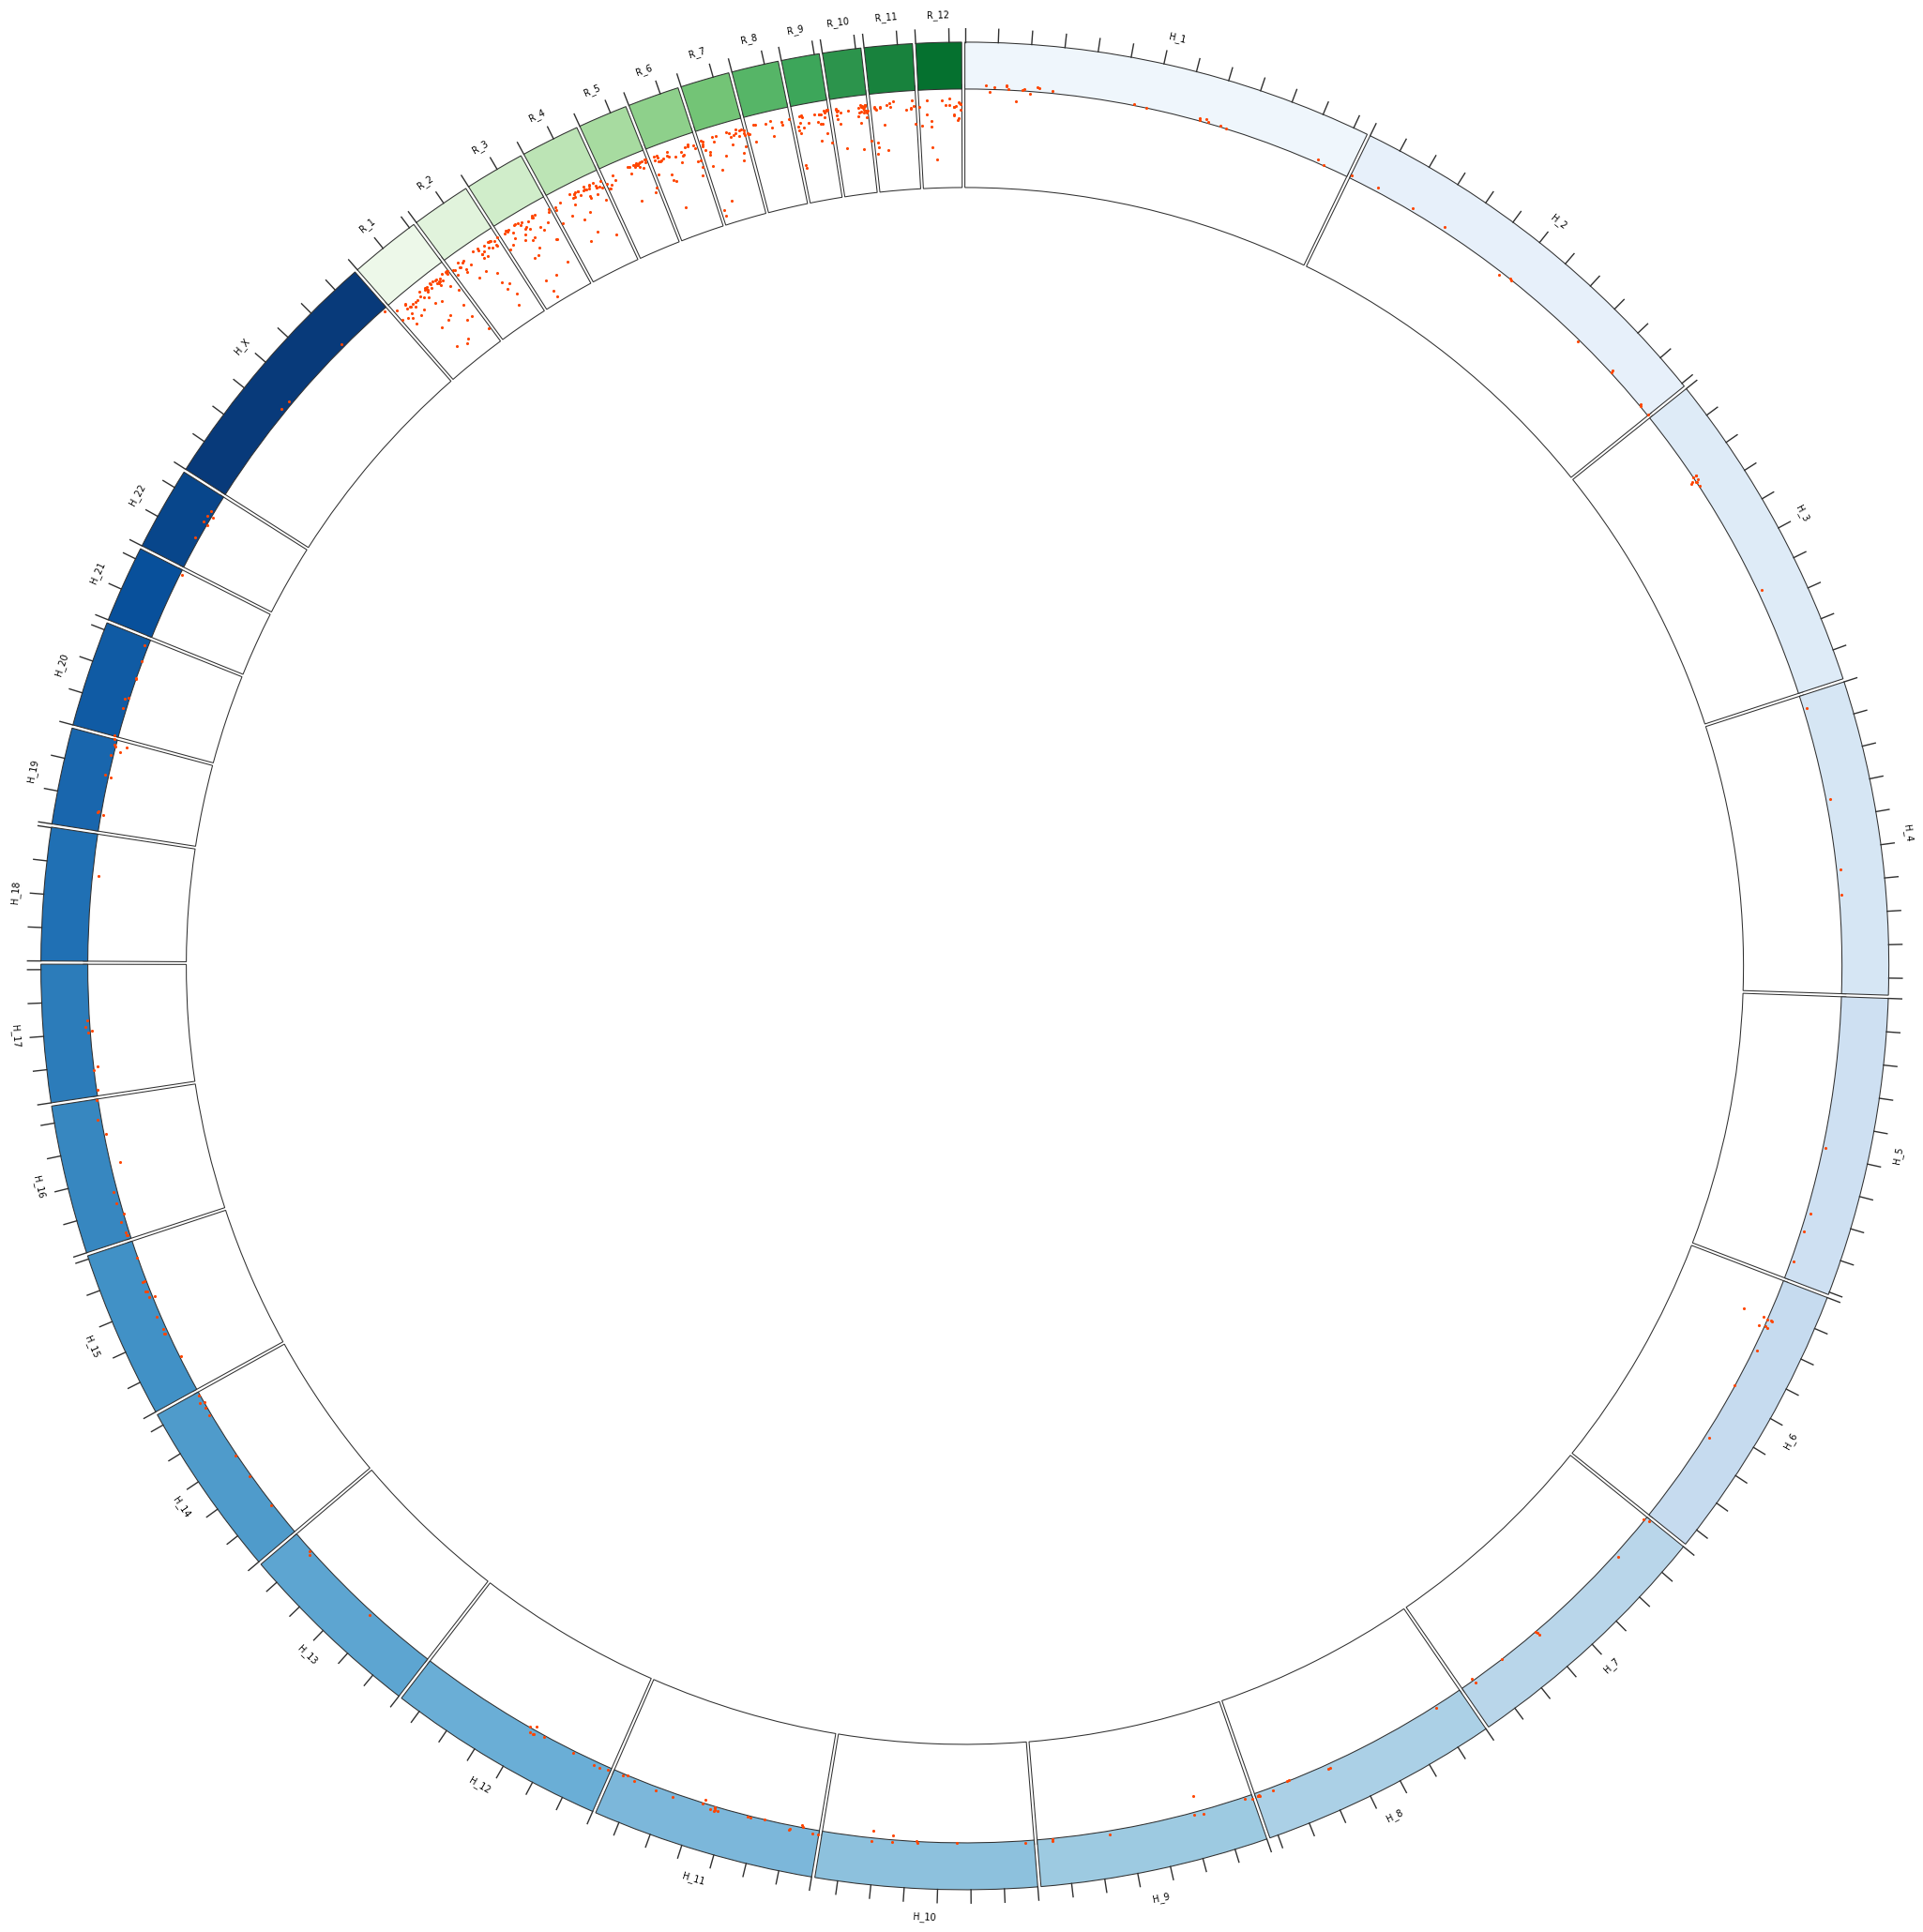

In [10]:
circle.figure

## linkplot of GOslim terms for human vs rice upregulated genes

In [11]:
merged_df_goslim_sorted = pd.read_csv("../data/circos_hr_DOWN_2311/combined_goslim_enrichment_DOWN.tsv", sep='\t')
display(merged_df_goslim_sorted)

GOSlim GOSlim GOA Accession(s)  \
0                   GO:0005764: lysosome              GO:0005764   
1                   GO:0005764: lysosome              GO:0005764   
2                   GO:0005764: lysosome              GO:0005764   
3                   GO:0005764: lysosome              GO:0005764   
4                   GO:0005764: lysosome              GO:0005764   
...                                  ...                     ...   
18457  GO:0005783: endoplasmic reticulum              GO:0005783   
18458  GO:0005783: endoplasmic reticulum              GO:0005783   
18459  GO:0005783: endoplasmic reticulum              GO:0005783   
18460  GO:0005783: endoplasmic reticulum              GO:0005783   
18461  GO:0005783: endoplasmic reticulum              GO:0005783   

      GOSlim GOA Description       GOSlim_domain Gene stable ID_rice  \
0                   lysosome  cellular_component        Os01g0613500   
1                   lysosome  cellular_component        Os01g0971400   
2                   lysosome  cellular_component        Os02g0715000   
3                   lysosome  cellular_component        Os01g0613500   
4                   lysosome  cellular_component        Os01g0613500   
...                      ...                 ...                 ...   
18457  endoplasmic reticulum  cellular_component        Os05g0482400   
18458  endoplasmic reticulum  cellular_component        Os05g0482400   
18459  endoplasmic reticulum  cellular_component        Os05g0482400   
18460  endoplasmic reticulum  cellular_component        Os05g0482400   
18461  endoplasmic reticulum  cellular_component        Os05g0482400   

      Gene stable ID_human Chromosome/scaffold name_rice  start1 (bp)  \
0          ENSG00000125538                           R_1     24343518   
1          ENSG00000240857                           R_1     42855657   
2          ENSG00000068001                           R_2     29667743   
3          ENSG00000170961                           R_1     24343518   
4          ENSG00000166189                           R_1     24343518   
...                    ...                           ...          ...   
18457      ENSG00000166189                           R_5     23728568   
18458      ENSG00000111186                           R_5     23728568   
18459      ENSG00000160678                           R_5     23728568   
18460      ENSG00000147168                           R_5     23728568   
18461      ENSG00000175283                           R_5     23728568   

       end1 (bp) Chromosome/scaffold name_human  start2 (bp)  end2 (bp)  \
0       24345172                            H_2    112829751  112836816   
1       42857462                            H_2     18554723   18560679   
2       29669572                            H_3     50317790   50322782   
3       24345172                            H_8    121612116  121641440   
4       24345172                           H_10    102065349  102068036   
...          ...                            ...          ...        ...   
18457   23738372                           H_10    102065349  102068036   
18458   23738372                           H_12      1529891    1647212   
18459   23738372                            H_1    153627926  153632039   
18460   23738372                            H_X     71107404   71112108   
18461   23738372                            H_9    128945530  128947603   

       HN-score(HN5)_rice  HN-score(HN5)_human  counts_down  fold_enrichment  \
0                     -75                  -28           21         5.178879   
1                     -41                  -15           21         5.178879   
2                     -41                  -22           21         5.178879   
3                     -75                  -24           21         5.178879   
4                     -75                  -36           21         5.178879   
...                   ...                  ...          ...              ...   
18457         

In [12]:
values_all   = [] 
arcdata_dict = collections.defaultdict(dict)

min_enrichment = merged_df_goslim_sorted['fold_enrichment'].min()
max_enrichment = merged_df_goslim_sorted['fold_enrichment'].max()
min_counts = merged_df_goslim_sorted[f'counts_{direction}'].min()
max_counts = merged_df_goslim_sorted[f'counts_{direction}'].max()

n_colors_above = len(merged_df_goslim_sorted[merged_df_goslim_sorted['fold_enrichment'] > 1.5]['GOSlim'].unique())
n_colors_below = len(merged_df_goslim_sorted[merged_df_goslim_sorted['fold_enrichment'] <= 1.5]['GOSlim'].unique())

# Create color palette
red_palette = sns.color_palette("plasma", n_colors=n_colors_above)
blue_palette = sns.color_palette("crest", n_colors=n_colors_below)

def get_color (fold_enrichment, goslim_term, threshold=1.5):
    normalized = (fold_enrichment - min_enrichment) / (max_enrichment - min_enrichment)
    if fold_enrichment > threshold:
        index = merged_df_goslim_sorted[merged_df_goslim_sorted['fold_enrichment'] > 1.5]['GOSlim'].unique().tolist().index(goslim_term)
        return red_palette[index % n_colors_above]
    else:
        index = merged_df_goslim_sorted[merged_df_goslim_sorted['fold_enrichment'] <= 1.5]['GOSlim'].unique().tolist().index(goslim_term)
        return blue_palette[index % n_colors_below]

def get_linewidth(fold_enrichment, min_enrichment, max_enrichment, 
                  min_linewidth_below, max_linewidth_below, 
                  min_linewidth_above, max_linewidth_above, threshold=1.5):
    normalized = (fold_enrichment - min_enrichment) / (max_enrichment - min_enrichment)
    if fold_enrichment > threshold:
        return min_linewidth_above + (max_linewidth_above - min_linewidth_above) * normalized
    else:
        return min_linewidth_below + (max_linewidth_below - min_linewidth_below) * normalized
    
min_linewidth_below = 1 * 10**-4
max_linewidth_below = 1 * 10**-6
min_linewidth_above = 0.04
max_linewidth_above = 0.05


for index, row in merged_df_goslim_sorted.iterrows():
    ontology = row['GOSlim']
    fold_enrichment = row['fold_enrichment']
    counts_up = row[f'counts_{direction}']

    color = get_color(fold_enrichment, ontology)
    linewidth = get_linewidth(fold_enrichment, min_enrichment, max_enrichment, 
                              min_linewidth_below, max_linewidth_below, 
                              min_linewidth_above, max_linewidth_above)
    name1 = row['Chromosome/scaffold name_rice'] # rice
    start1 = int(row['start1 (bp)'])
    end1 = int(row['end1 (bp)'])
    name2 = row['Chromosome/scaffold name_human'] # human
    start2 = int(row['start2 (bp)'])
    end2 = int(row['end2 (bp)'])

    source = (name1, start1, end1, 830)
    destination = (name2, start2, end2, 830)
    circle.chord_plot(source, 
                        destination, 
                        facecolor=color,
                        linewidth=linewidth,
                        edgecolor=color
    )

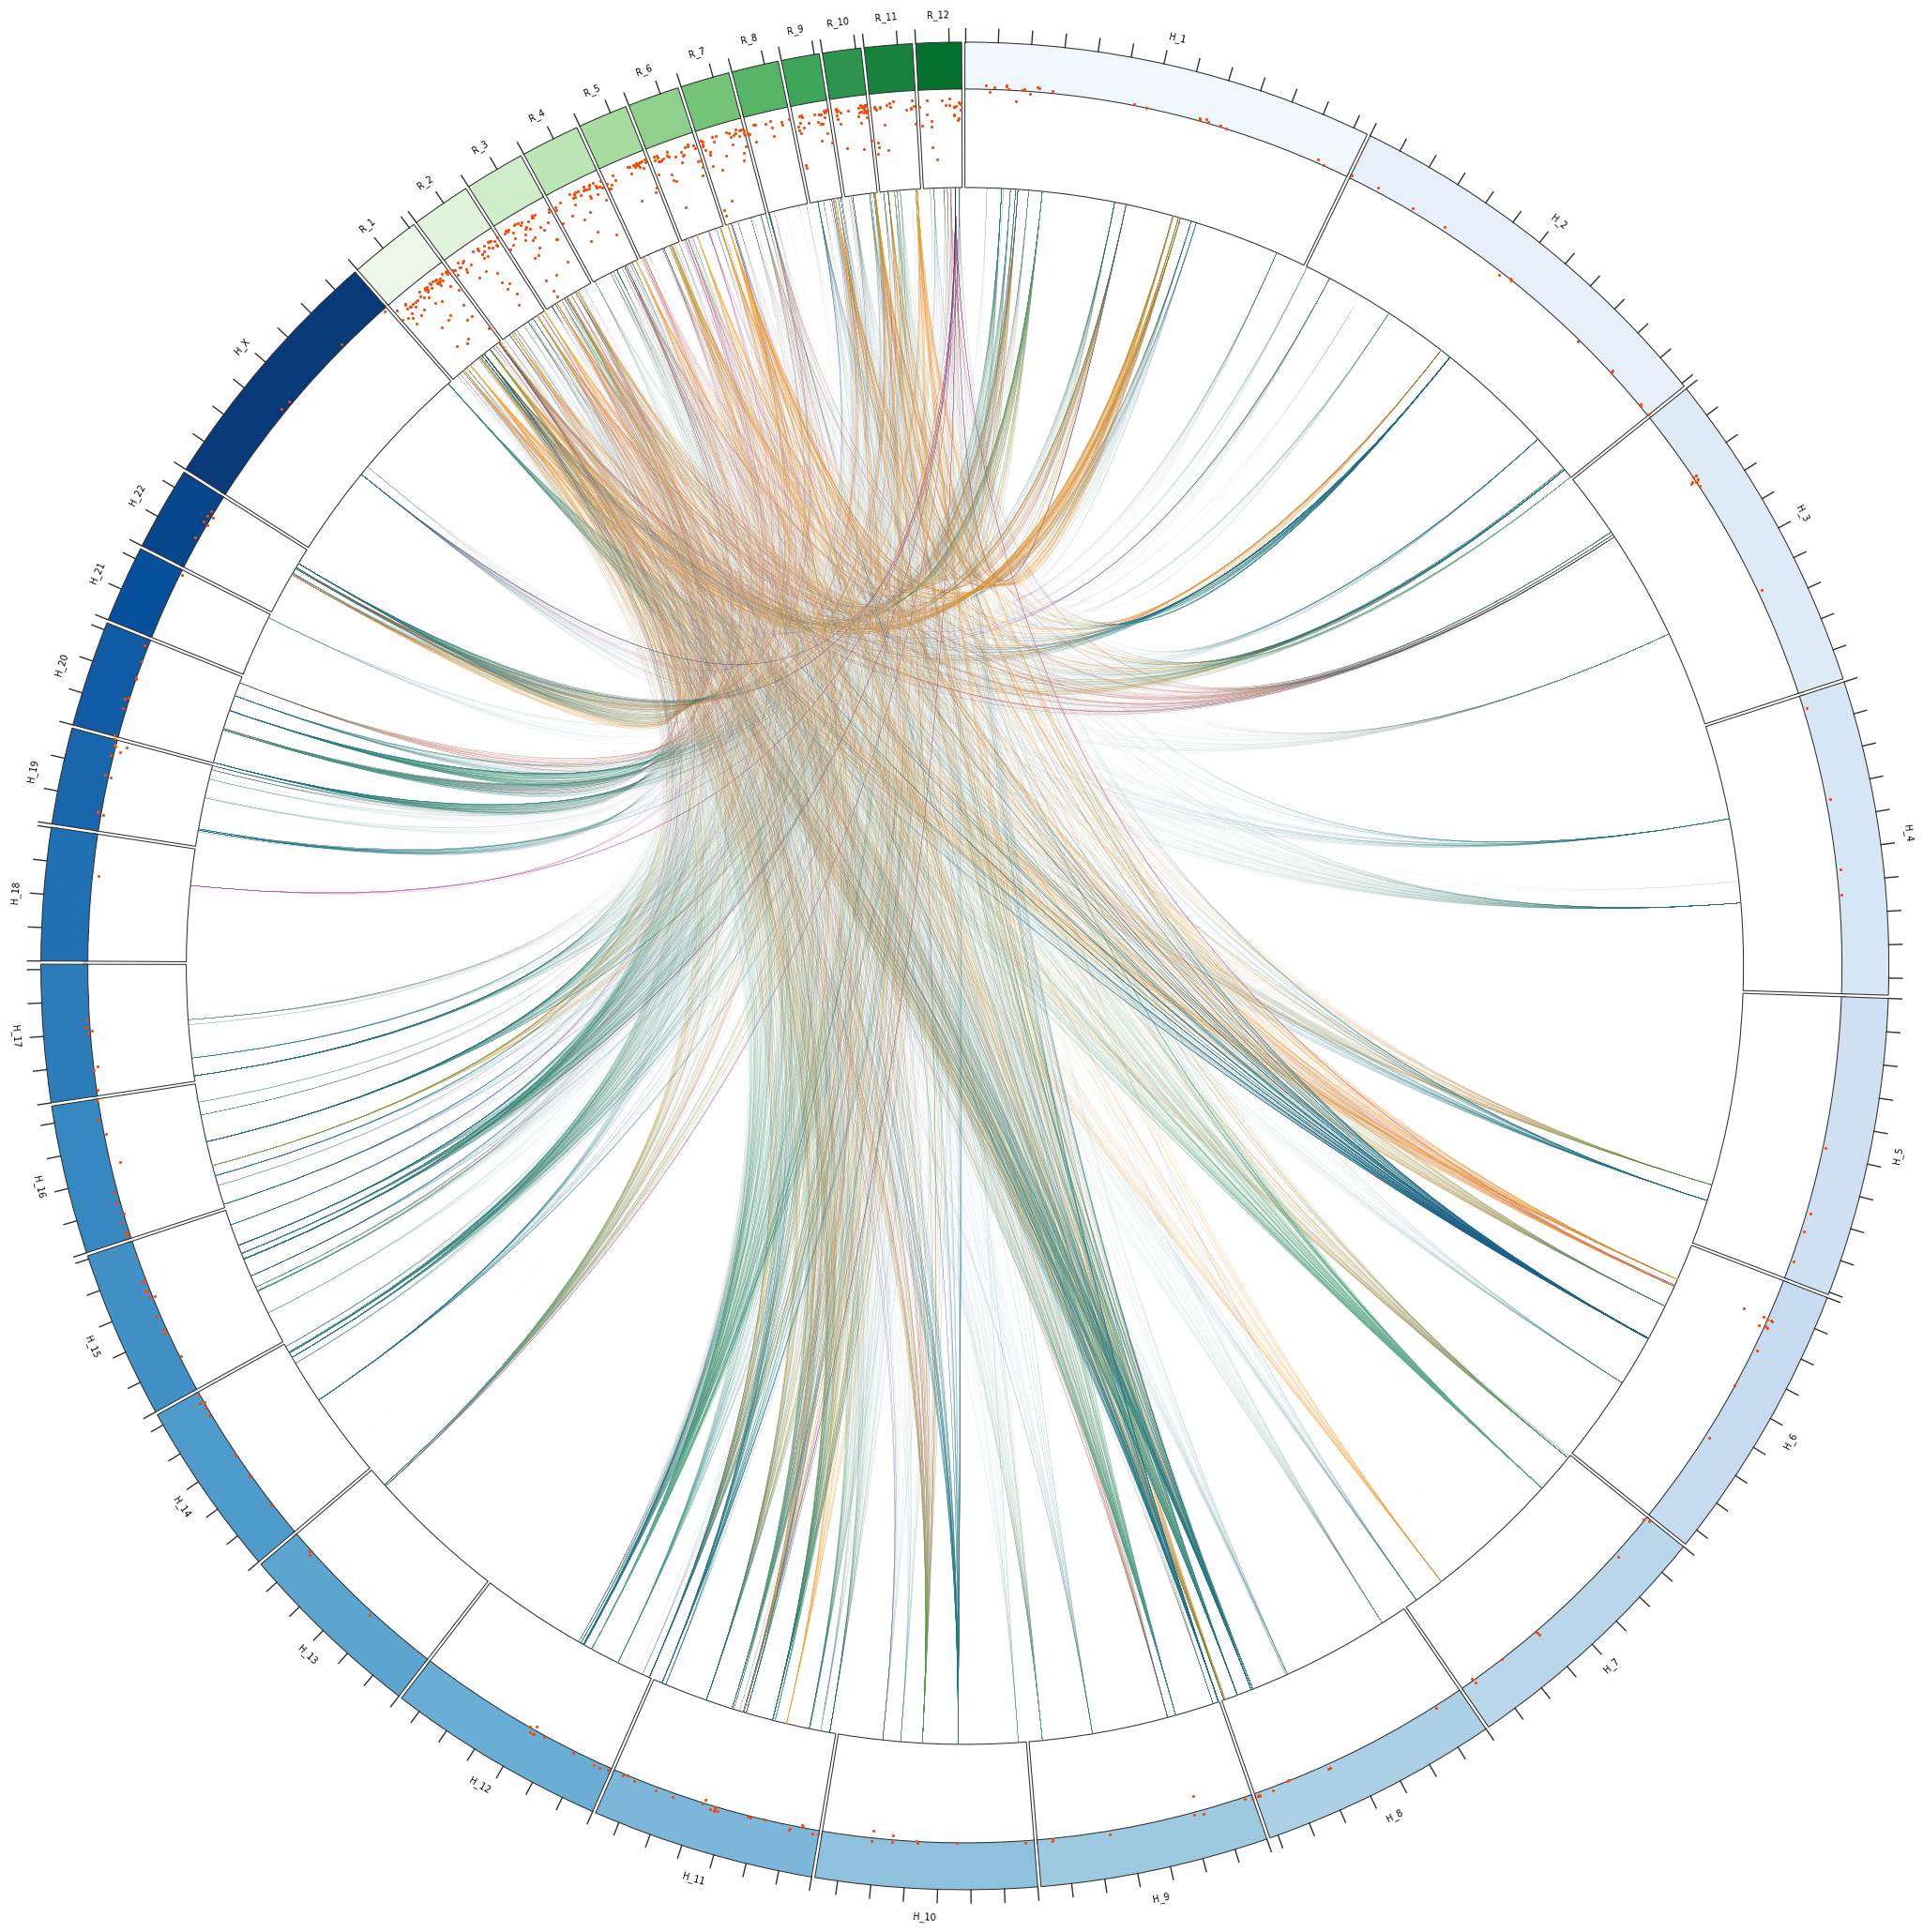

In [13]:
circle.figure

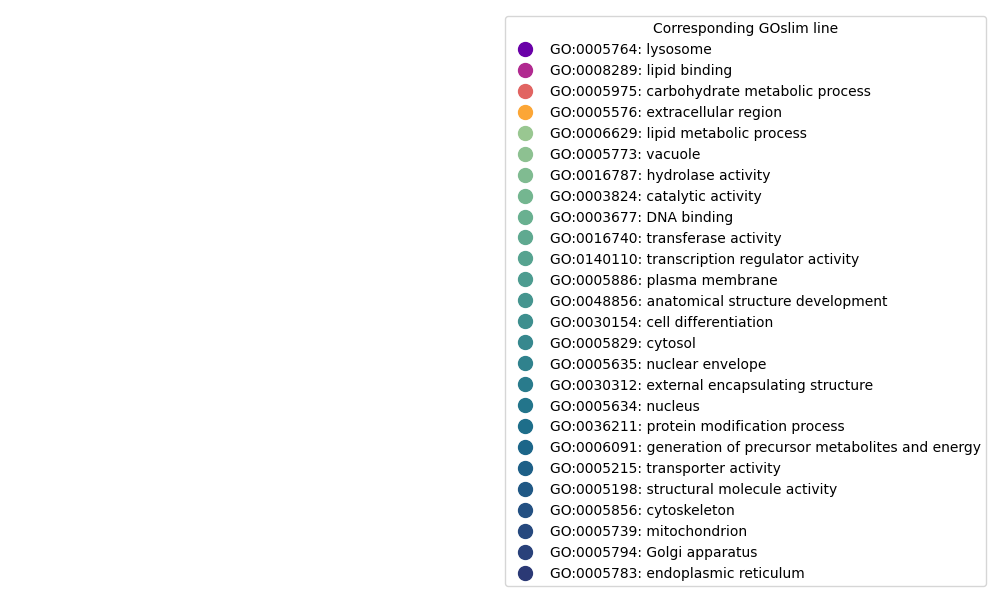

In [14]:
ontology_color_dict = {}
for ontology in merged_df_goslim_sorted['GOSlim'].unique():
    fold_enrichment = merged_df_goslim_sorted[merged_df_goslim_sorted['GOSlim'] == ontology]['fold_enrichment'].mean()
    ontology_color_dict[ontology] = get_color(fold_enrichment, ontology)

# Create legend
fig, ax = plt.subplots(figsize=(6, 6))
for ontology, color in ontology_color_dict.items():
    ax.plot([], [], 
            label=ontology, 
            color=color, 
            marker='o', 
            markersize=10, 
            linestyle='None')

ax.legend(title="Corresponding GOslim line", 
          bbox_to_anchor=(1.05, 1), 
          loc='upper left')
ax.axis('off')
plt.show()
